<a href="https://colab.research.google.com/github/shxdabb/ML-Lab/blob/main/practical_4_mllab_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Sample dataset (10 records, 3 features)
data = np.array([
    [1.58, 2.47, 0.93],
    [2.71, 0.54, 2.36],
    [0.61, 1.92, 2.15],
    [1.17, 2.89, 0.04],
    [2.31, 0.85, 1.63],
    [0.27, 2.58, 2.77],
    [2.02, 1.13, 1.44],
    [1.35, 2.20, 0.67],
    [2.86, 0.72, 2.19],
    [0.95, 1.46, 1.88]
])

# Step 2: Create DataFrame
df = pd.DataFrame(data, columns=['X', 'Y', 'Z'])

# Step 3: Preview the DataFrame
print(df)



      X     Y     Z
0  1.58  2.47  0.93
1  2.71  0.54  2.36
2  0.61  1.92  2.15
3  1.17  2.89  0.04
4  2.31  0.85  1.63
5  0.27  2.58  2.77
6  2.02  1.13  1.44
7  1.35  2.20  0.67
8  2.86  0.72  2.19
9  0.95  1.46  1.88


In [13]:
df.head()

,X,Y,Z
0,1.58,2.47,0.93
1,2.71,0.54,2.36
2,0.61,1.92,2.15
3,1.17,2.89,0.04
4,2.31,0.85,1.63


In [14]:
standardized_data = df -df.mean()/df.std()
cov_matrix = np.cov(standardized_data.T)


In [15]:
elg_vals, elg_vecs = np.linalg.eig(cov_matrix)

In [16]:
#step 5: Sort

sorted_indices = np.argsort(elg_vals)[::-1]
elg_vals = elg_vals[sorted_indices]
elg_vecs = elg_vecs[:, sorted_indices]


eig_vecs_subset = elg_vecs[:, :2]

In [17]:
reduced_data = standardized_data.to_numpy().dot(eig_vecs_subset)
reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])

In [18]:
#step 8 Output the reduced data


print("\nReduced Data (after PCA):\n",reduced_df)


Reduced Data (after PCA):
         PC1       PC2
0  0.831549 -0.723454
1 -1.725584 -0.039018
2  0.619263  0.832371
3  1.697963 -1.284460
4 -0.999035 -0.465736
5  1.067363  1.525559
6 -0.555517 -0.485273
7  0.881203 -0.822808
8 -1.633592 -0.265514
9  0.184470  0.435329


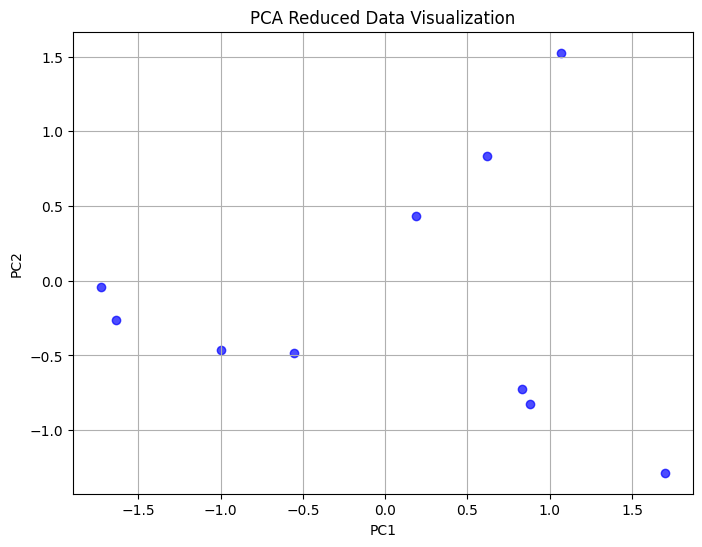

In [19]:
# Step 9 Visualize

plt.figure(figsize=(8, 6))
plt.scatter(reduced_df['PC1'], reduced_df['PC2'], c='blue', alpha=0.7)
plt.title('PCA Reduced Data Visualization')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()